# New York City Airbnb Open Data

- Performing EDA, visualization and data preparation and processing,
- clustering and anomaly eliminations
- build various ml models using auto ml including ensemble model - using autoviml

Dataset: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [ ]:
import zipfile
with zipfile.ZipFile("new-york-city-airbnb-open-data.zip", 'r') as zip_ref:
    zip_ref.extractall("airbnb_data")


In [ ]:
!pip install autoviml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6

In [ ]:
!pip install --upgrade autoviml

In [ ]:
import pandas as pd
df = pd.read_csv("airbnb_data/AB_NYC_2019.csv")  # Adjust the filename if different


Basic EDA

In [ ]:
# Display the first few rows
print(df.head())

# Get an overview of data types and missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
# Calculate the percentage of missing values per column
missing_values = df.isnull().mean() * 100
print(missing_values[missing_values > 0])


name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64


Visualize the distribution of numerical features:

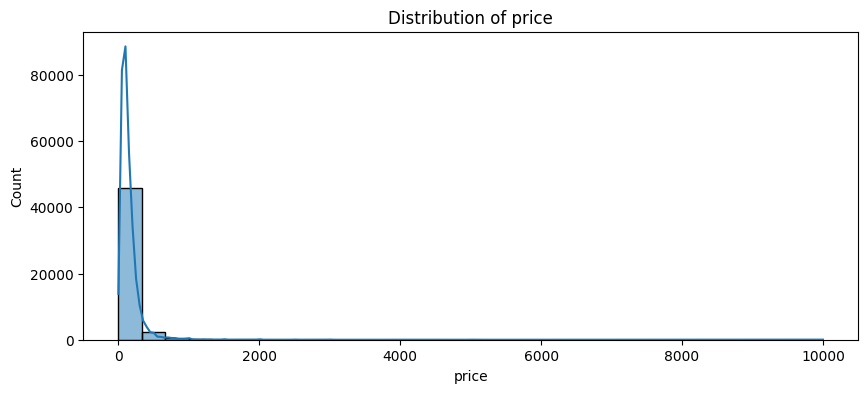

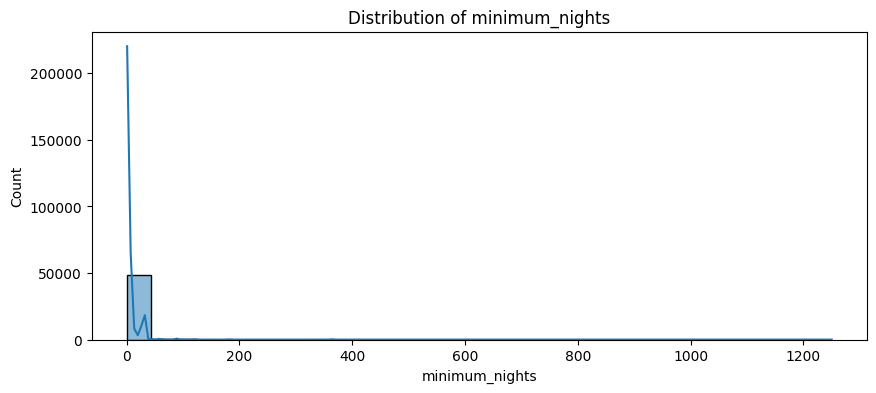

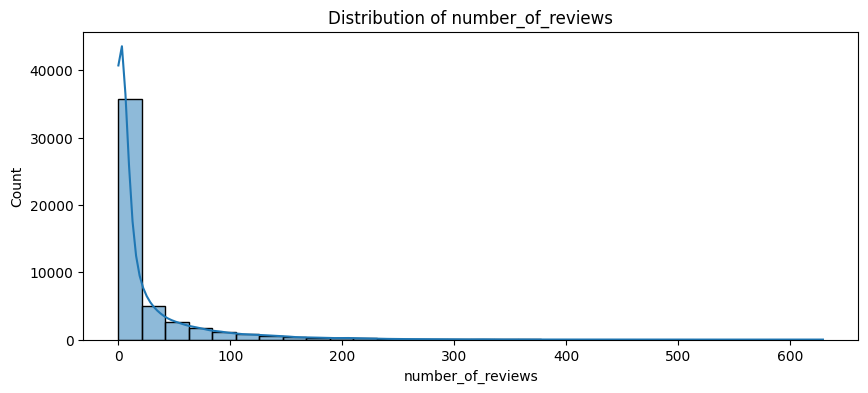

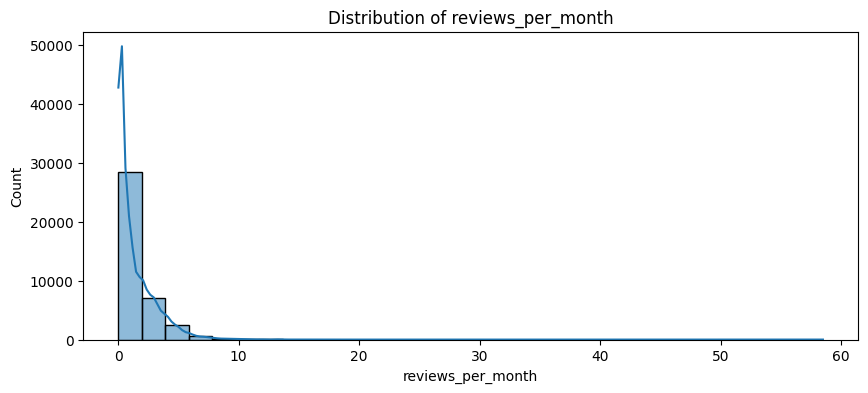

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for a few key numerical columns
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


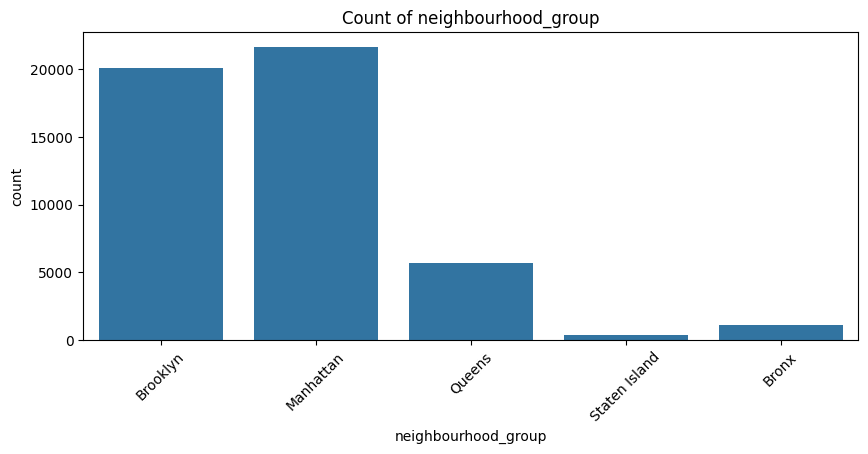

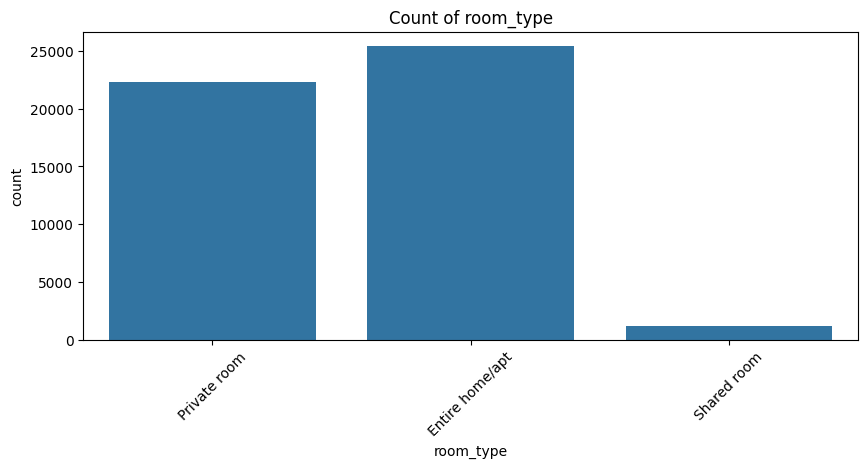

In [ ]:
# Plot distribution for categorical columns
categorical_columns = ['neighbourhood_group', 'room_type']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


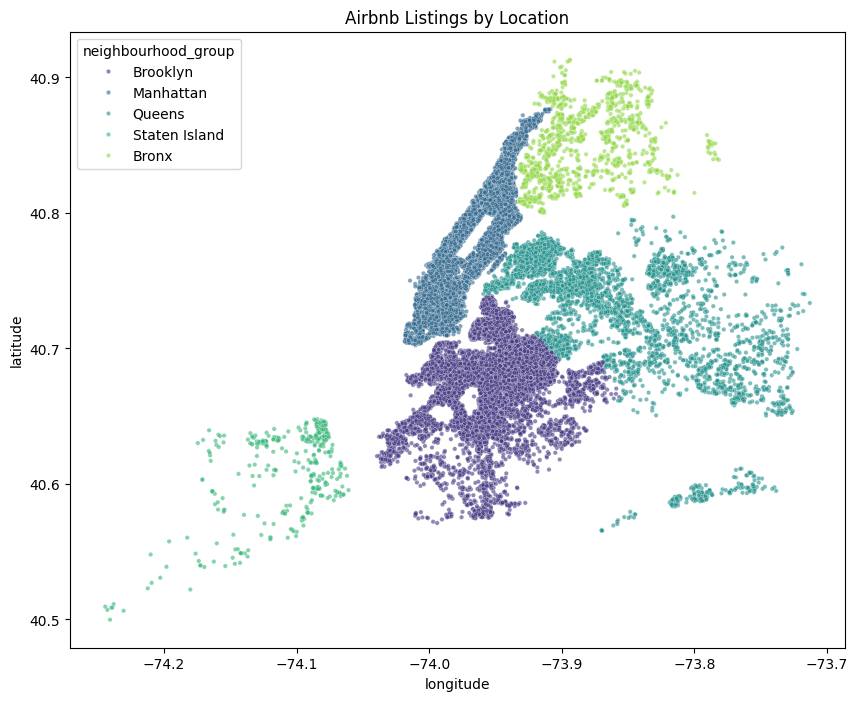

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood_group', palette='viridis', s=10, alpha=0.6)
plt.title('Airbnb Listings by Location')
plt.show()


# Automated Exploratory Data Analysis with Sweetviz

## Generate an interactive EDA report

* Install Sweetviz library
* Create a comprehensive report of the dataset
* Visualize data distributions, correlations, and comparisons
* View the report directly in the notebook



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 84.5 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


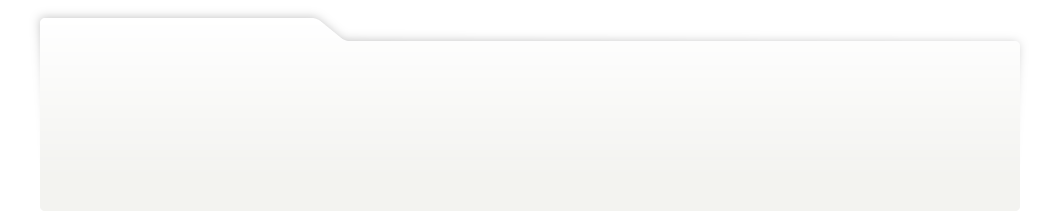
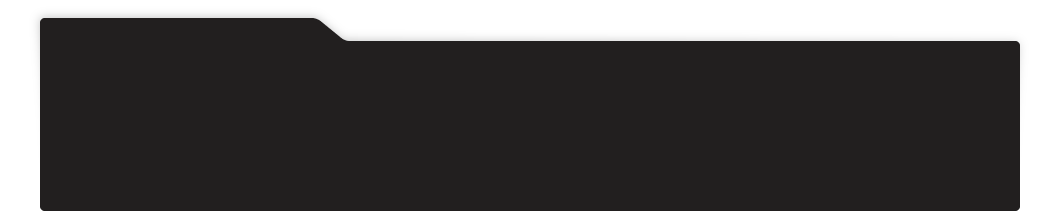
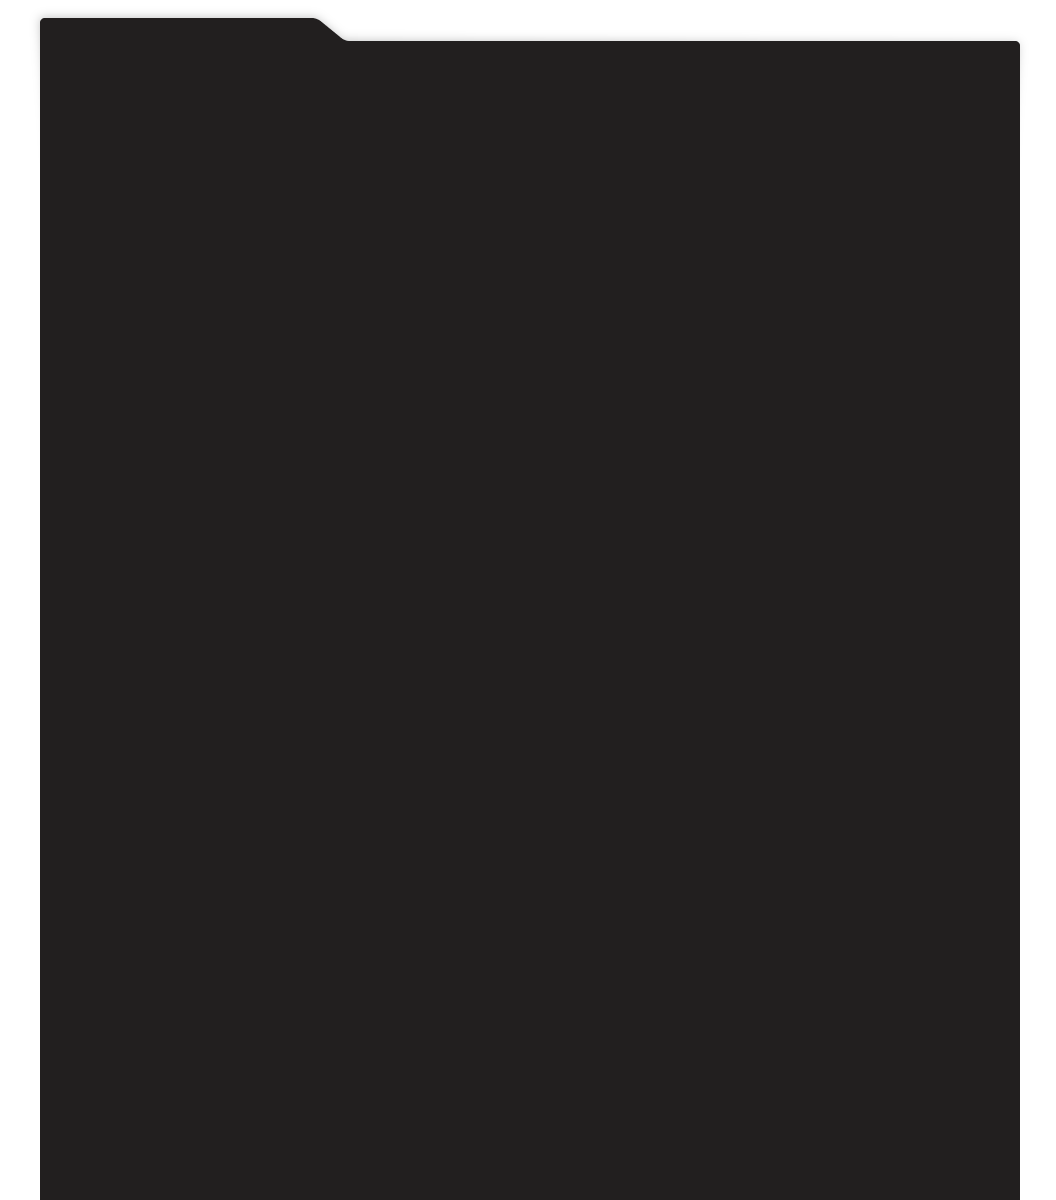
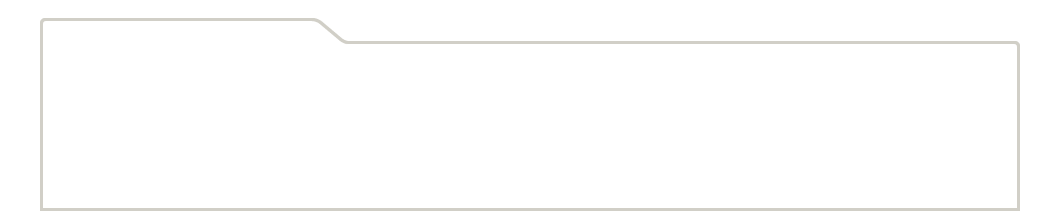
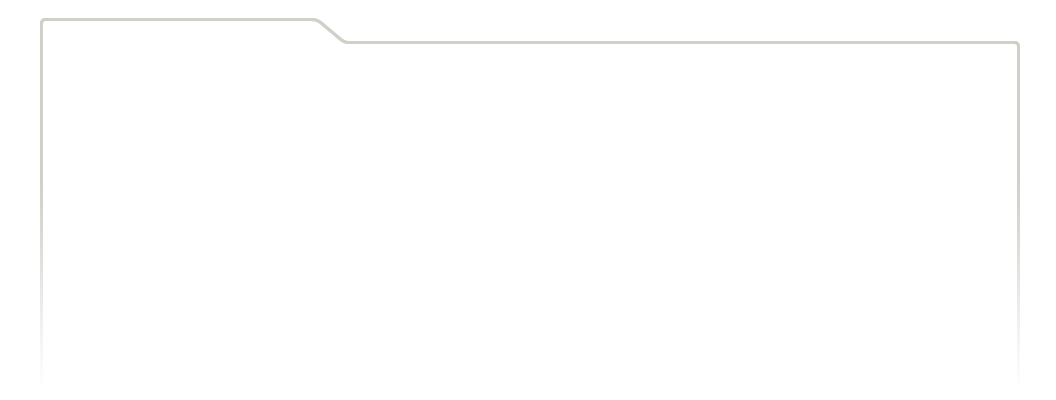
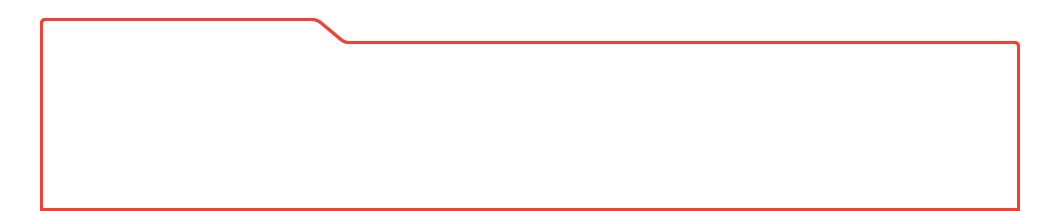
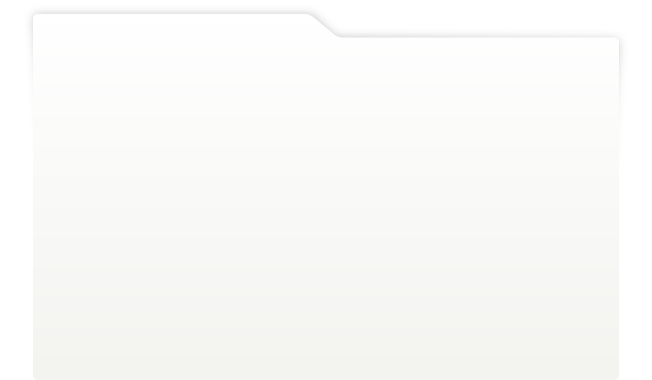
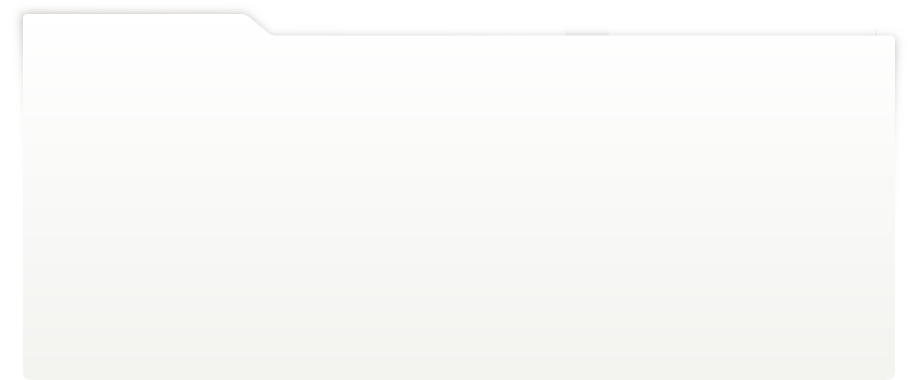
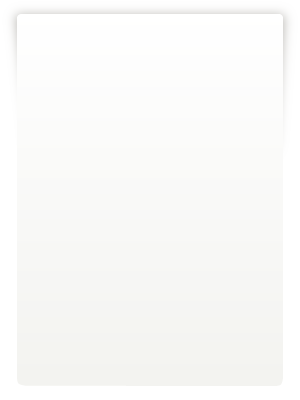
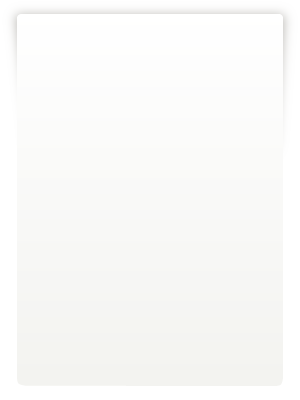
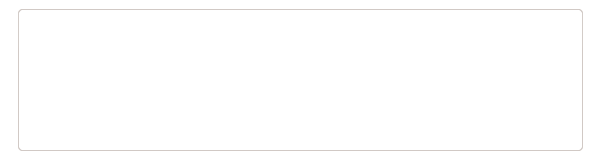
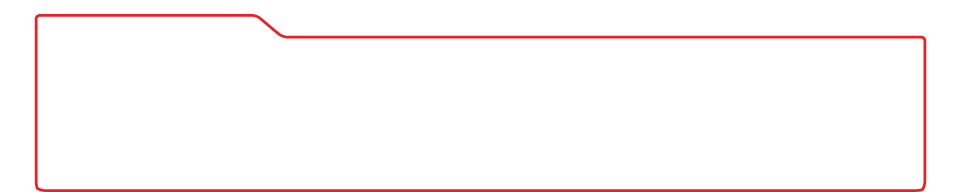
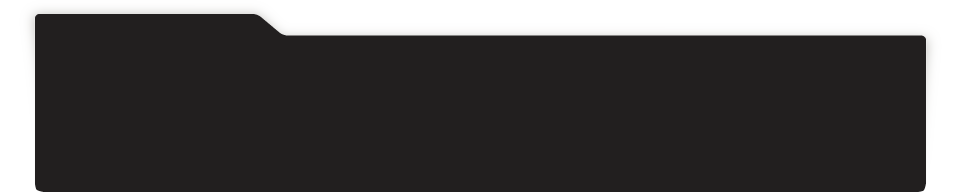
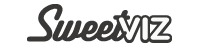
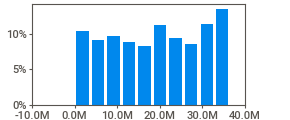
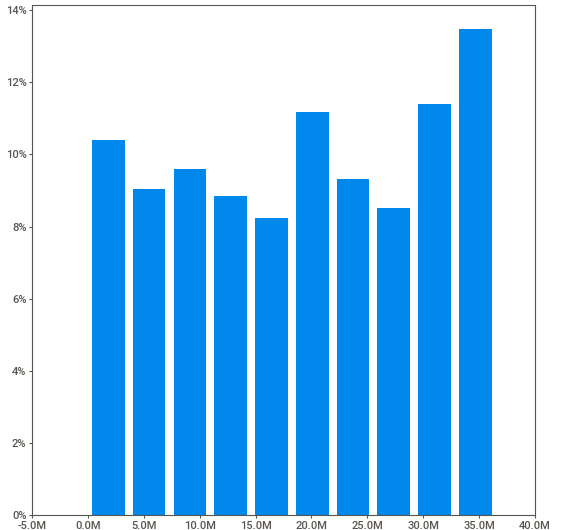
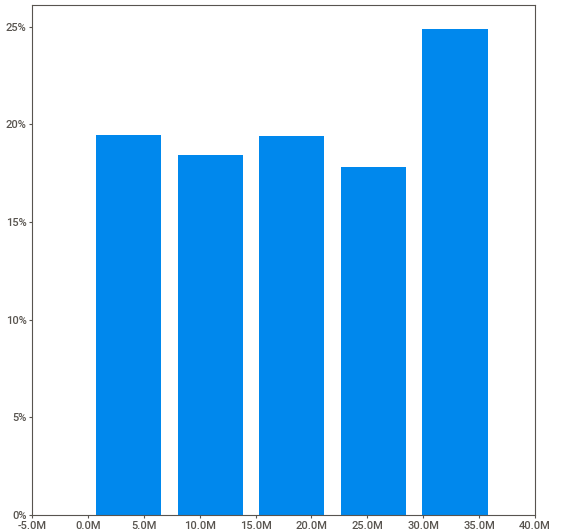
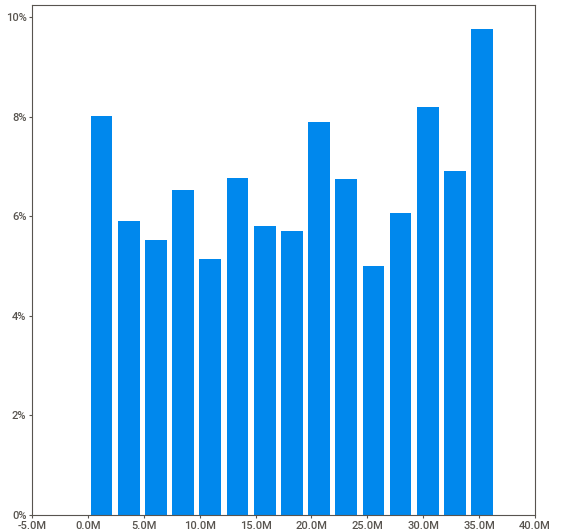
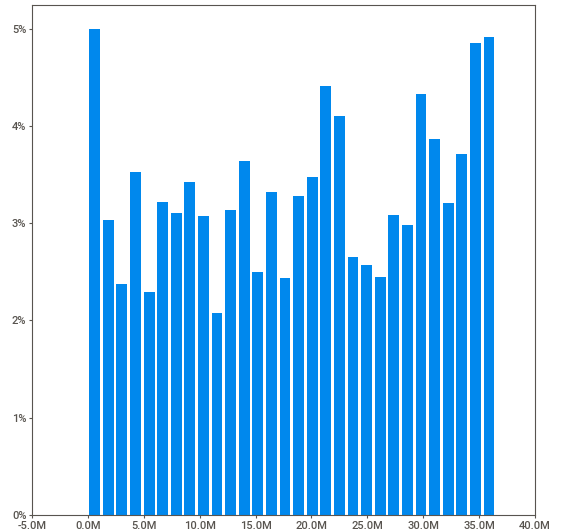
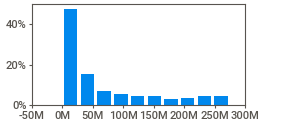
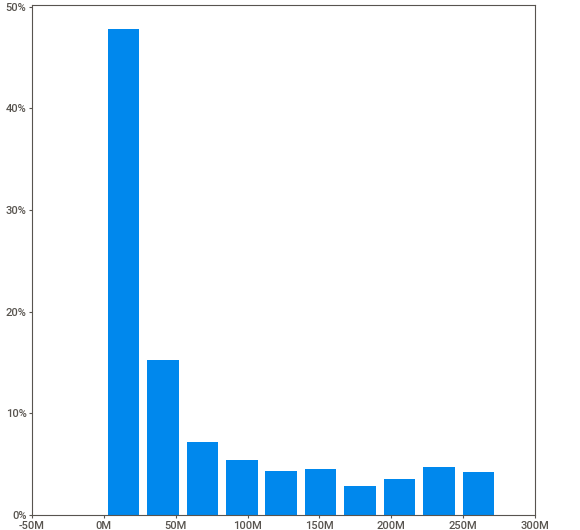
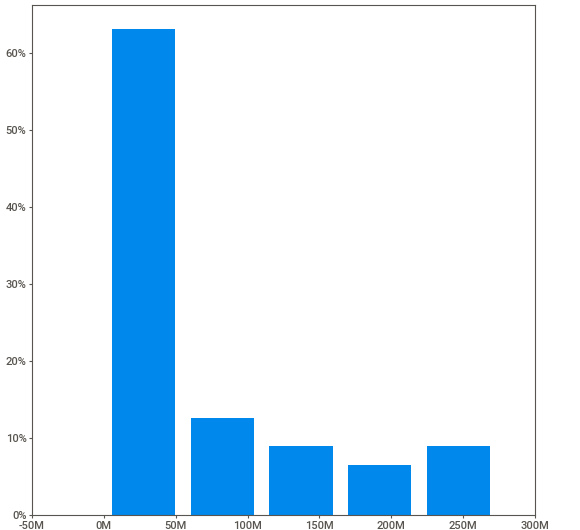
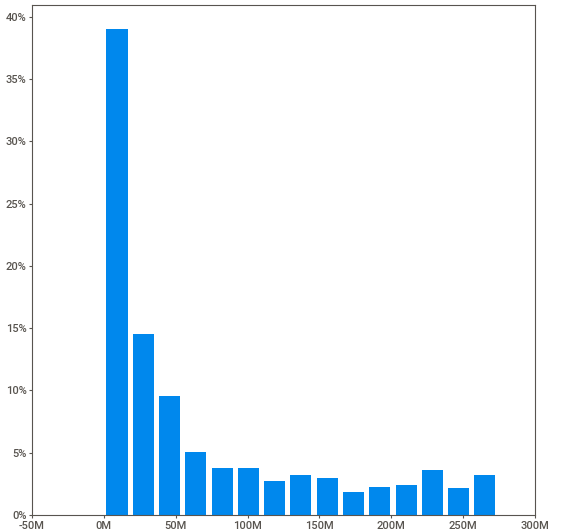
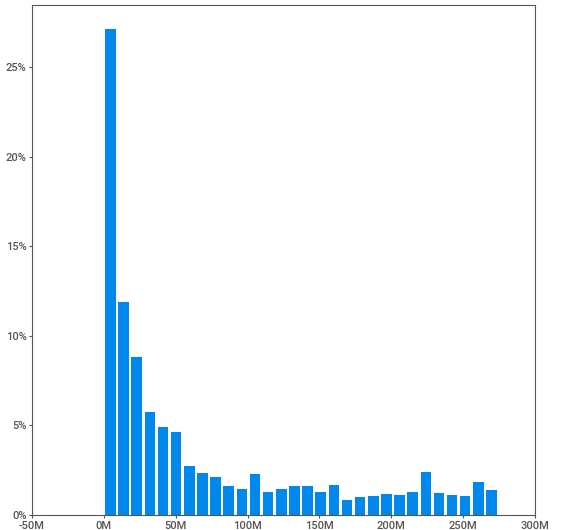
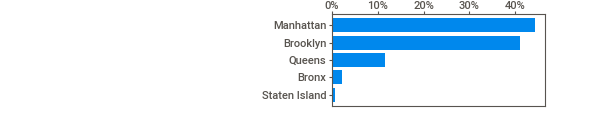
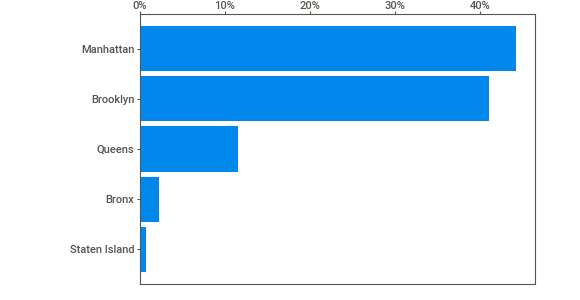
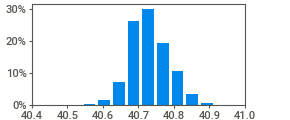
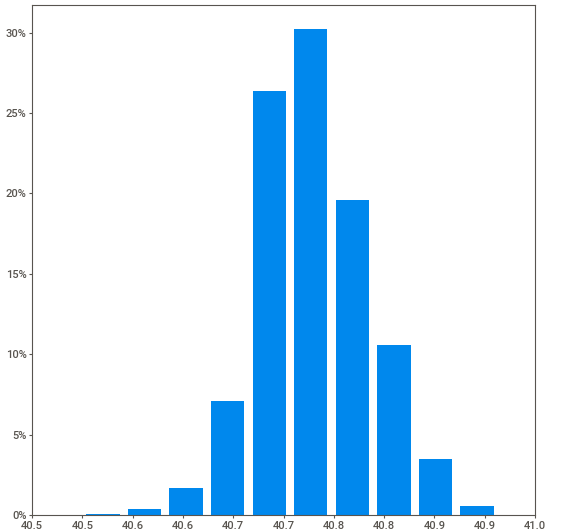
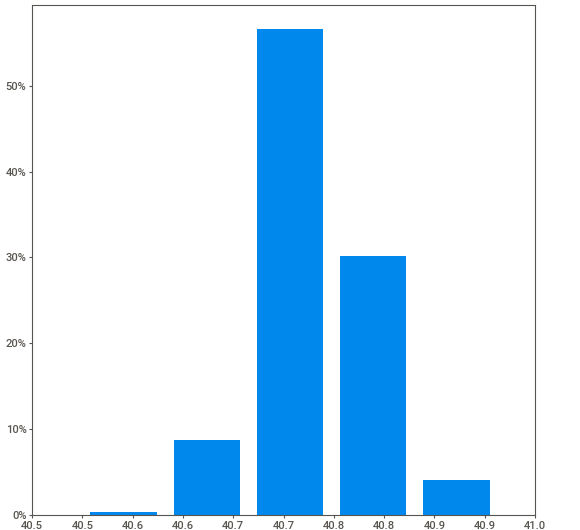
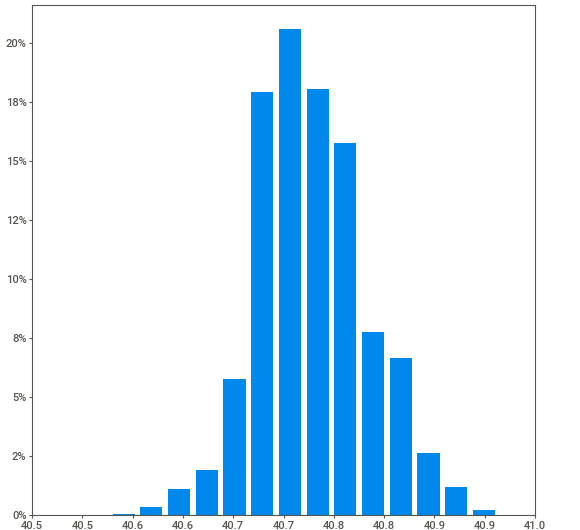
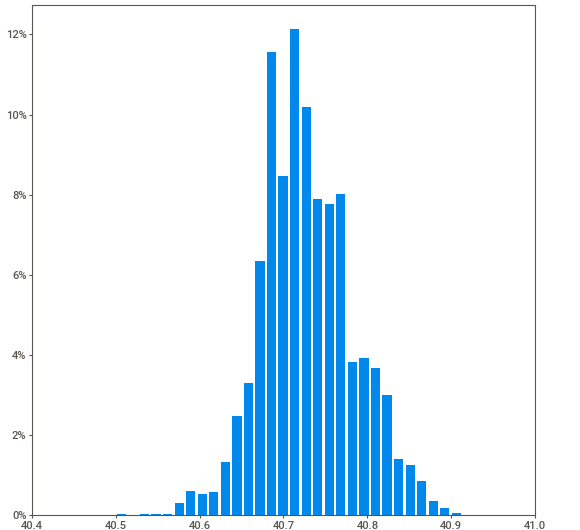
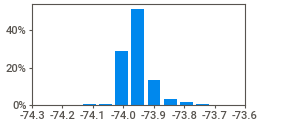
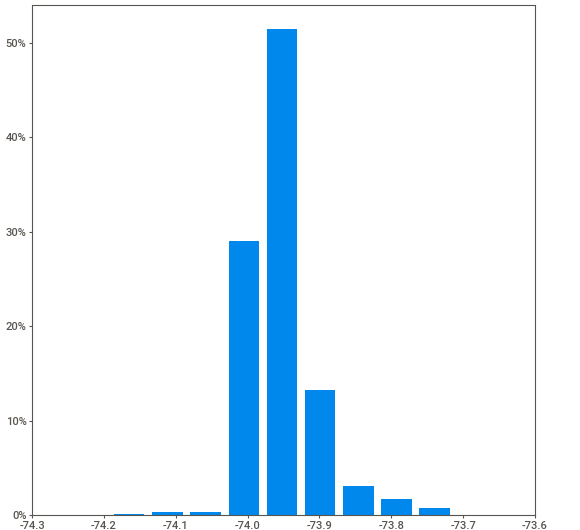
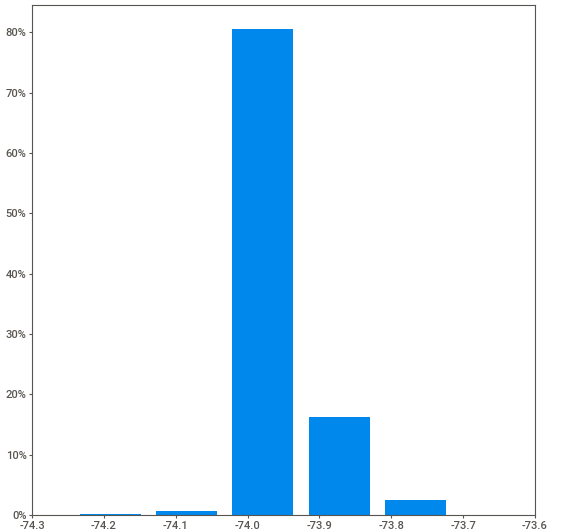
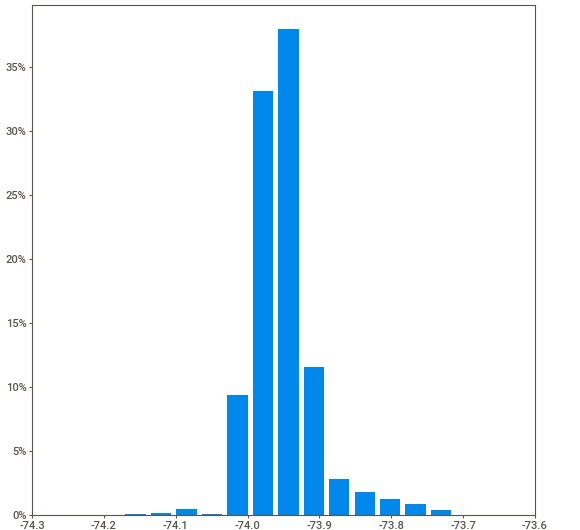
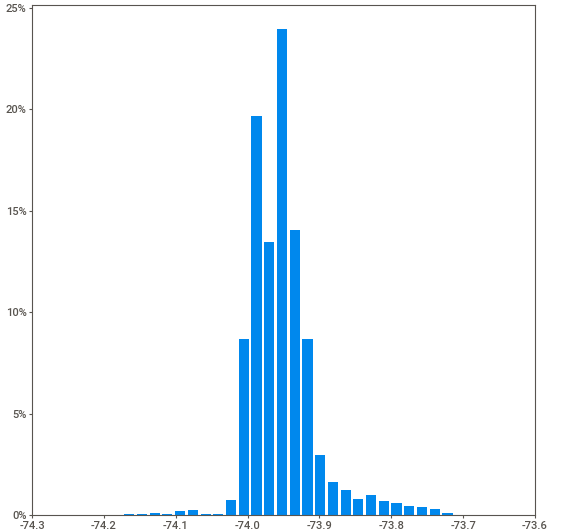
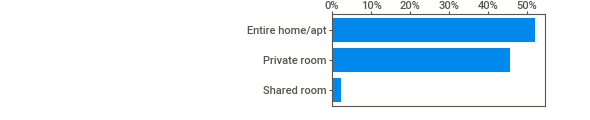
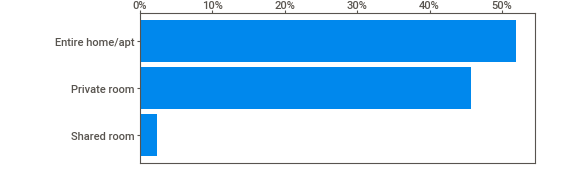
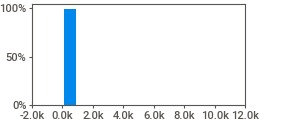
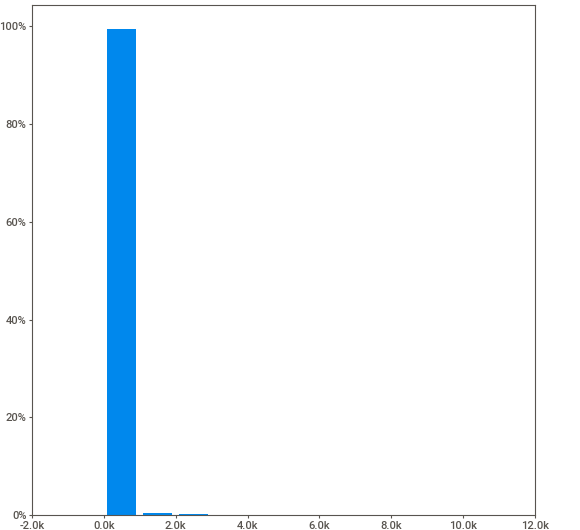
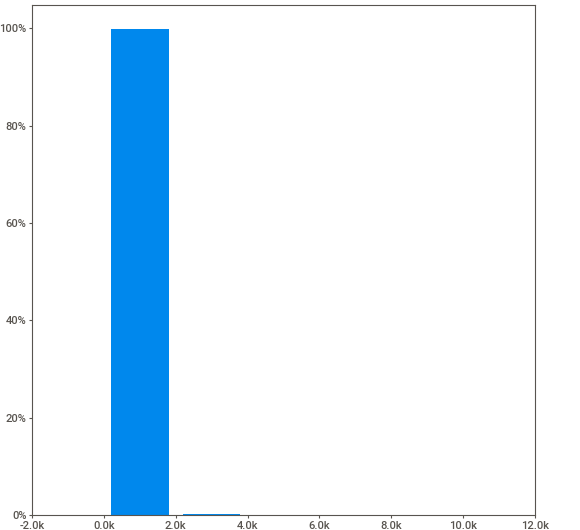
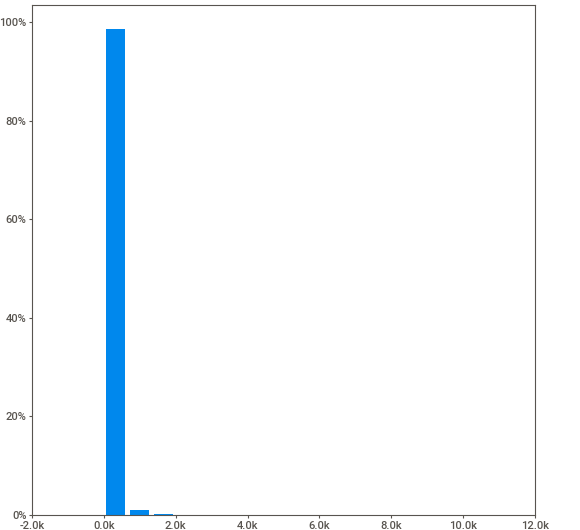
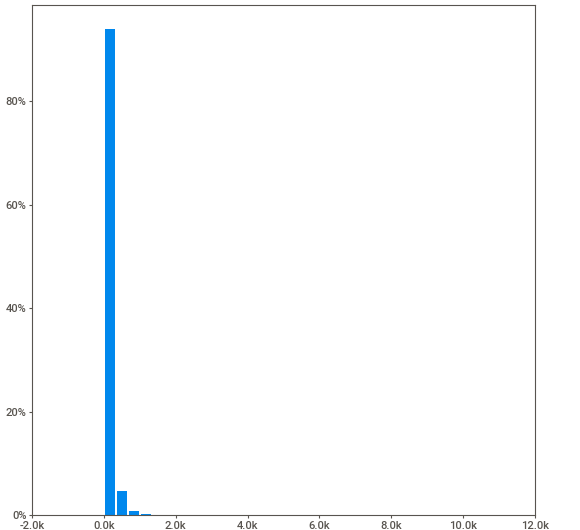
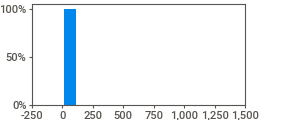
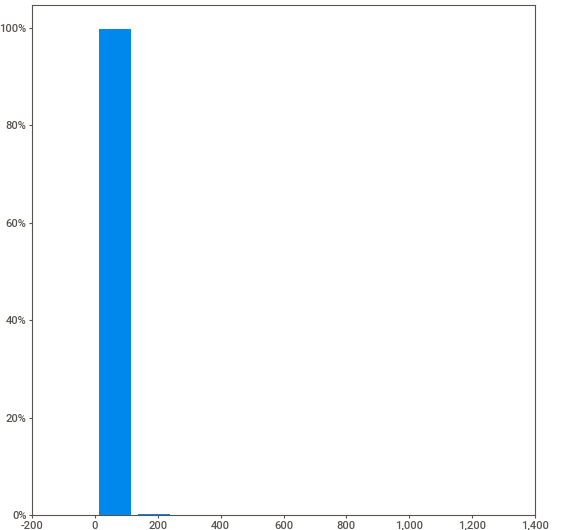
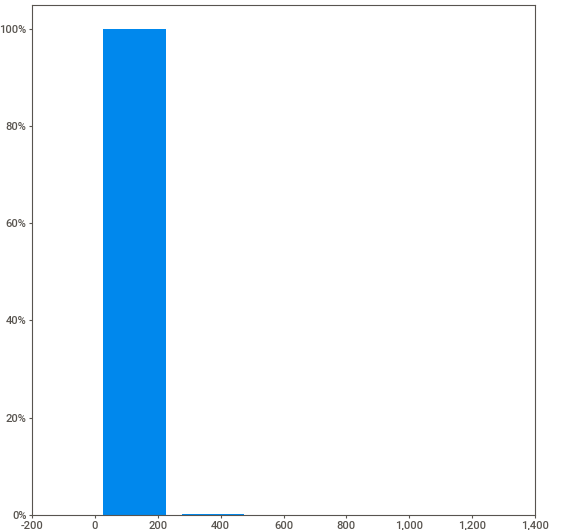
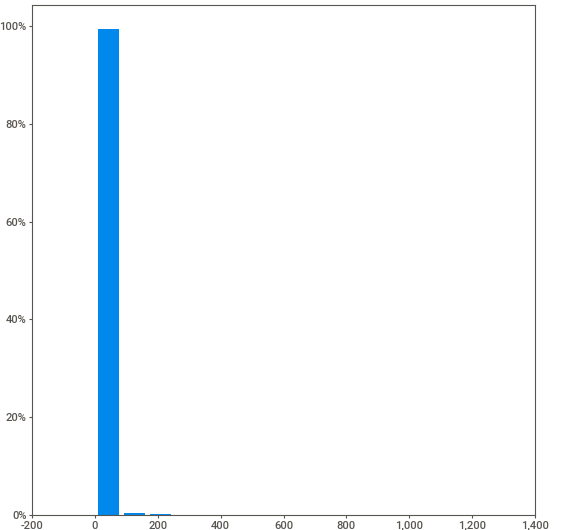
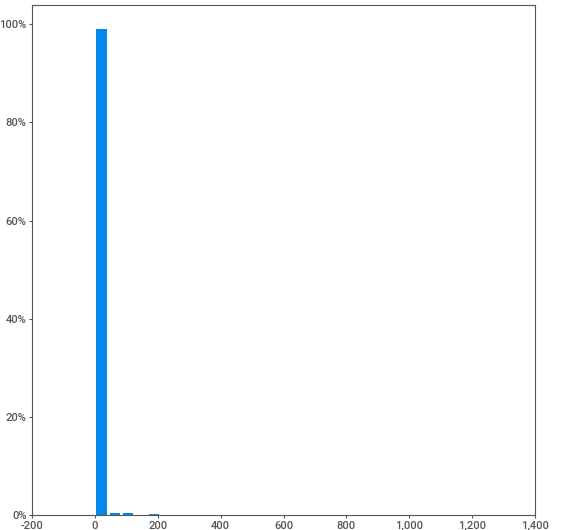
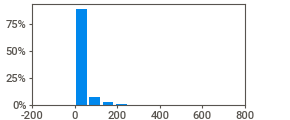
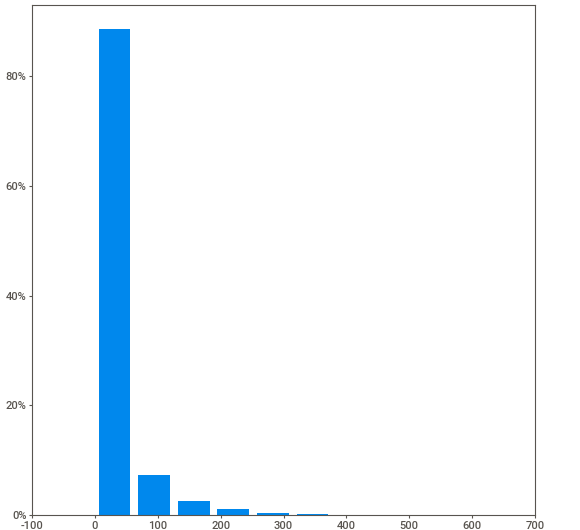
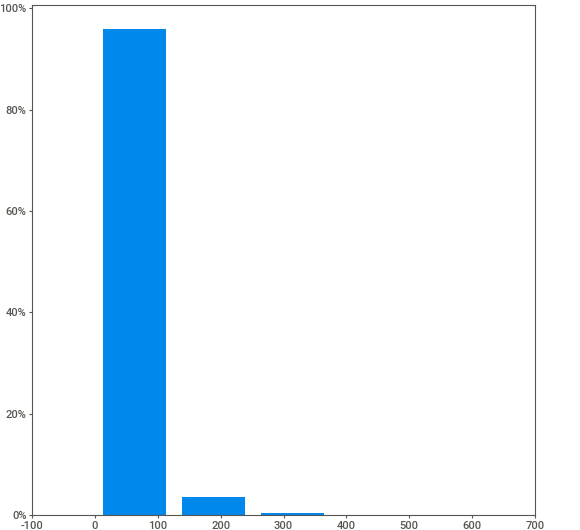
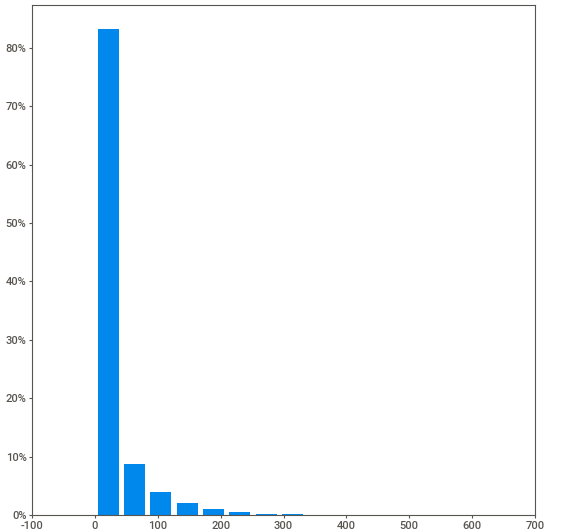
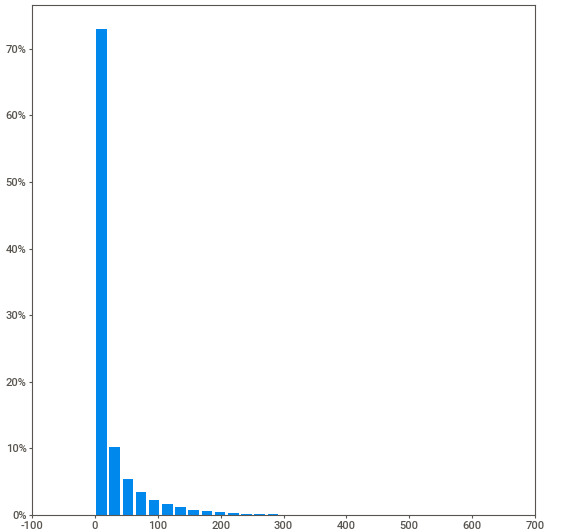
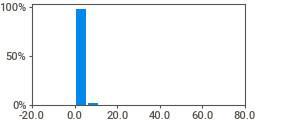
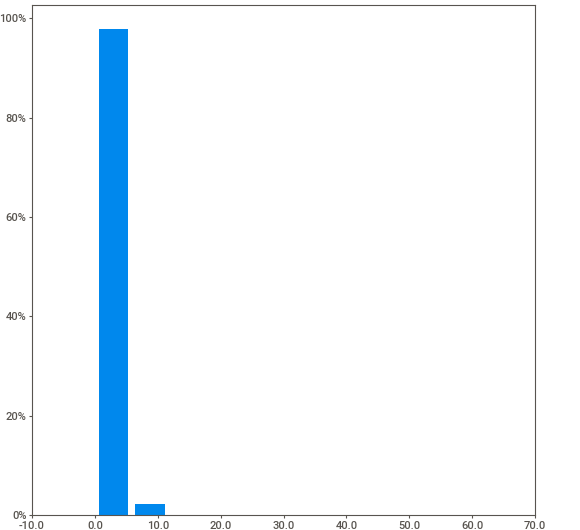
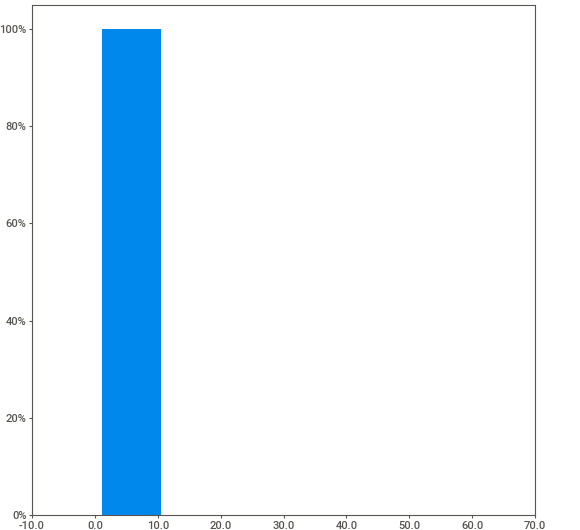
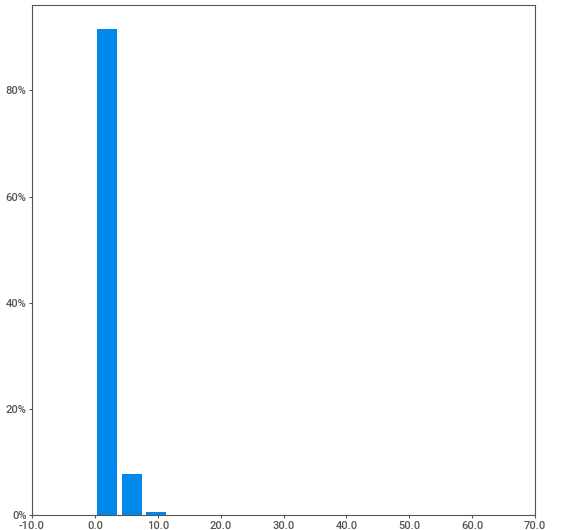
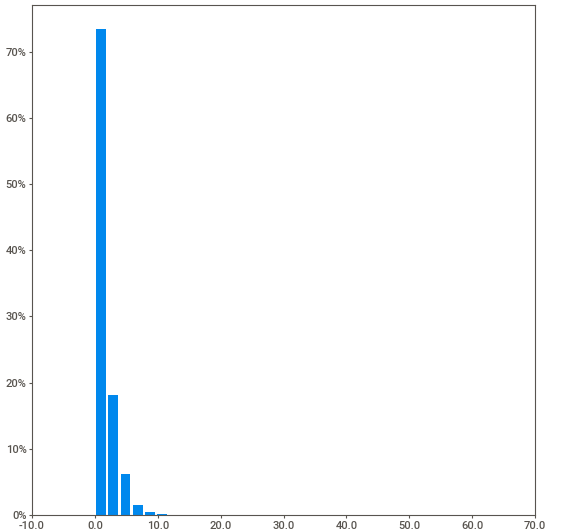
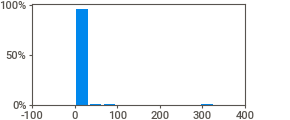
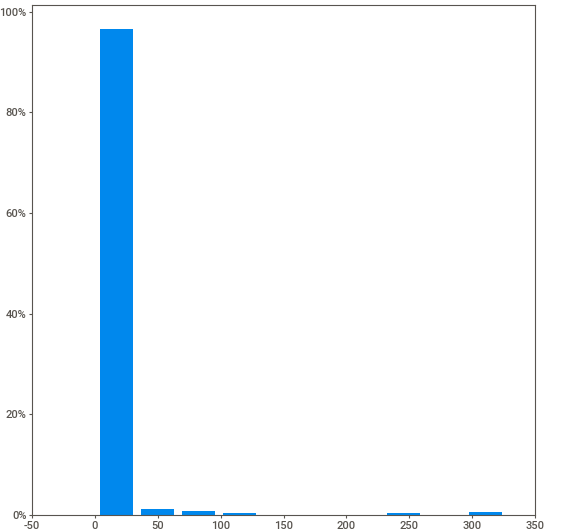
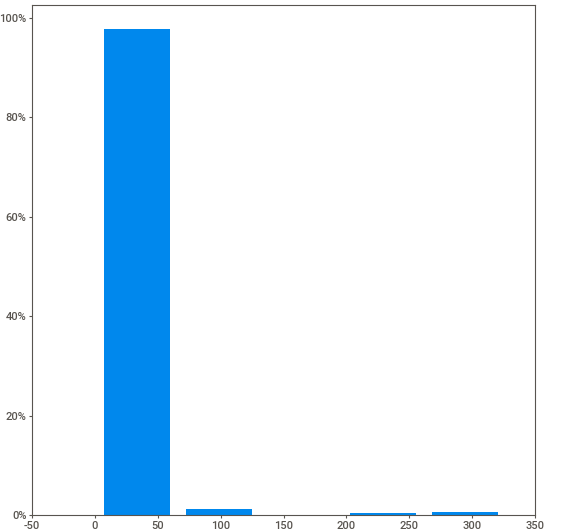
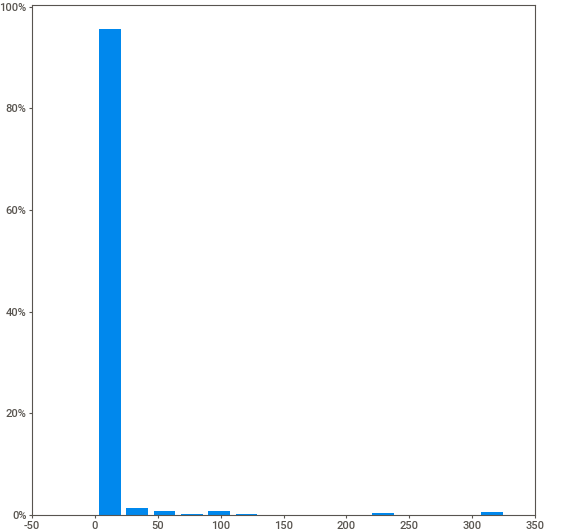
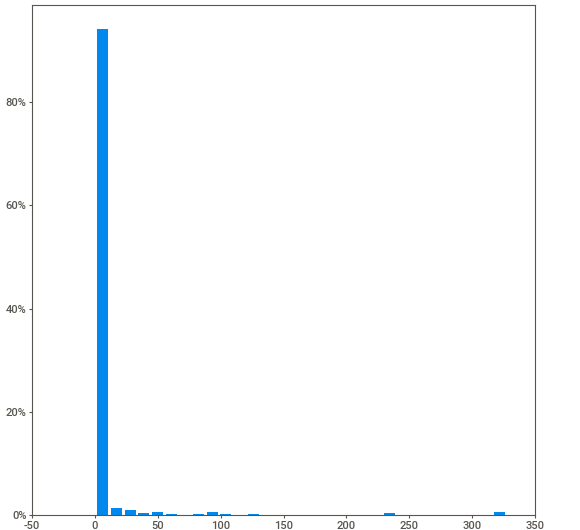
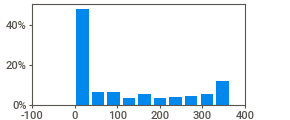
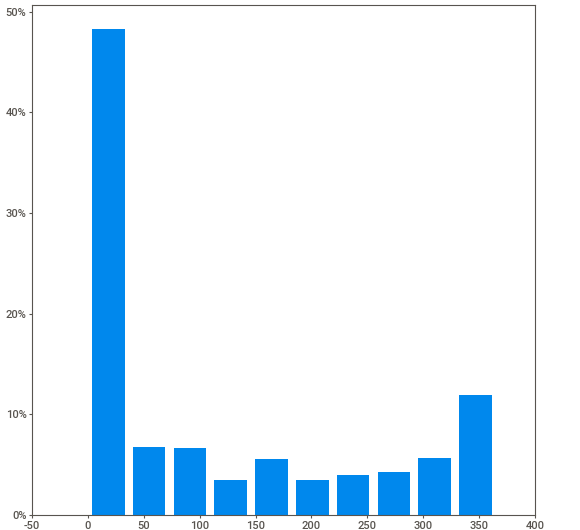
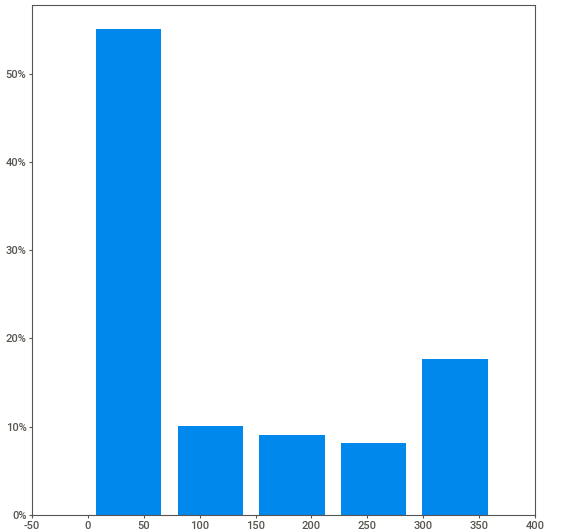
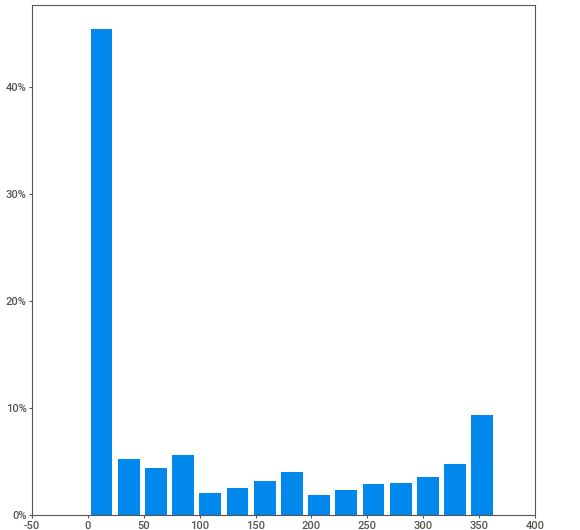
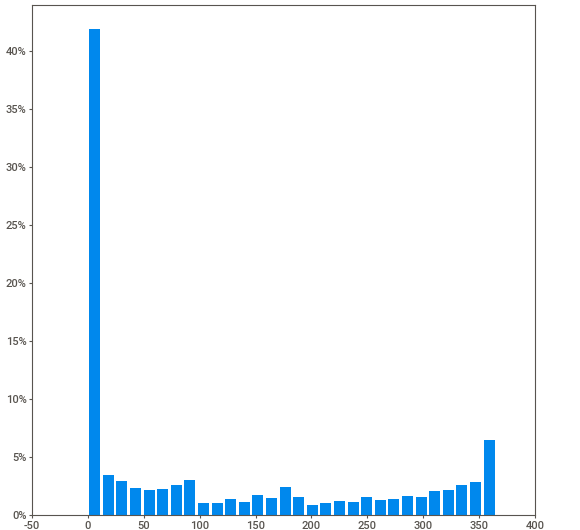
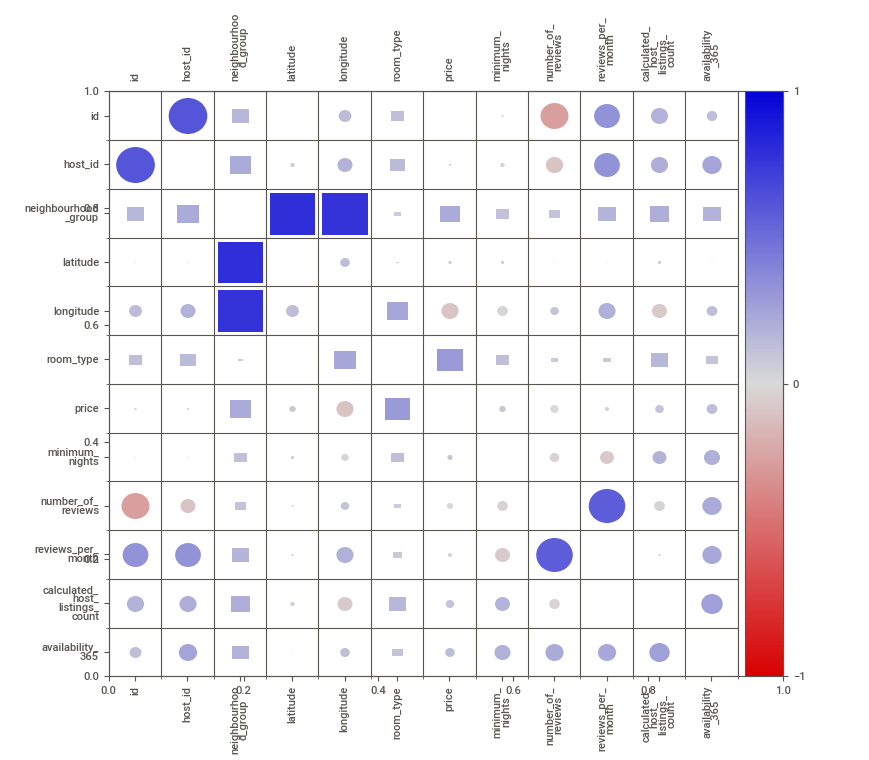
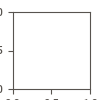

In [ ]:
!pip install sweetviz
import sweetviz as sv

report = sv.analyze(df)
report.show_notebook()


## Data Preprocessing and Cleaning

1. Handling Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [ ]:
# Impute missing values in reviews_per_month with the median
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

# Fill missing values in host_name with a placeholder
df['host_name'] = df['host_name'].fillna("Unknown")


2. Remove or Transform Outliers

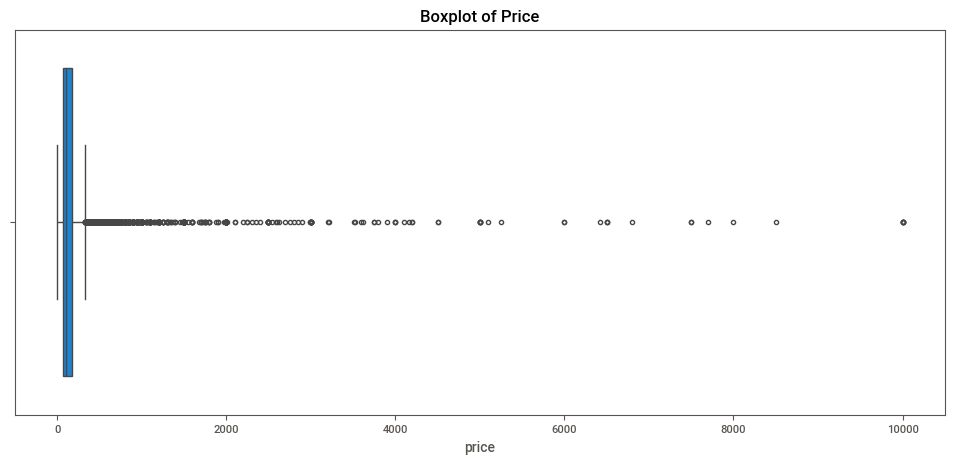

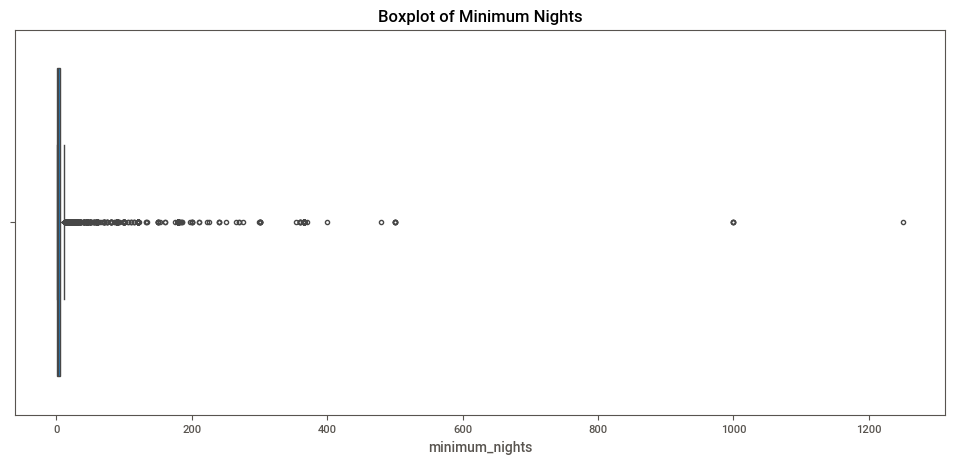

In [ ]:
# Plot boxplots to detect outliers in `price` and `minimum_nights`
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.show()


In [ ]:
# Cap `price` at 99th percentile to handle extreme outliers
price_cap = df['price'].quantile(0.99)
df['price'] = df['price'].apply(lambda x: price_cap if x > price_cap else x)


3. Encoding Categorical Variables

In [ ]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)


4. Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'latitude', 'longitude']

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])


5. Feature Selection

1. Correlation Analysis

#### Visualize relationships between numeric features

* Compute correlation matrix for numeric columns
* Create heatmap to visualize correlations
* Use color coding to represent correlation strength
* Display correlation coefficients in each cell

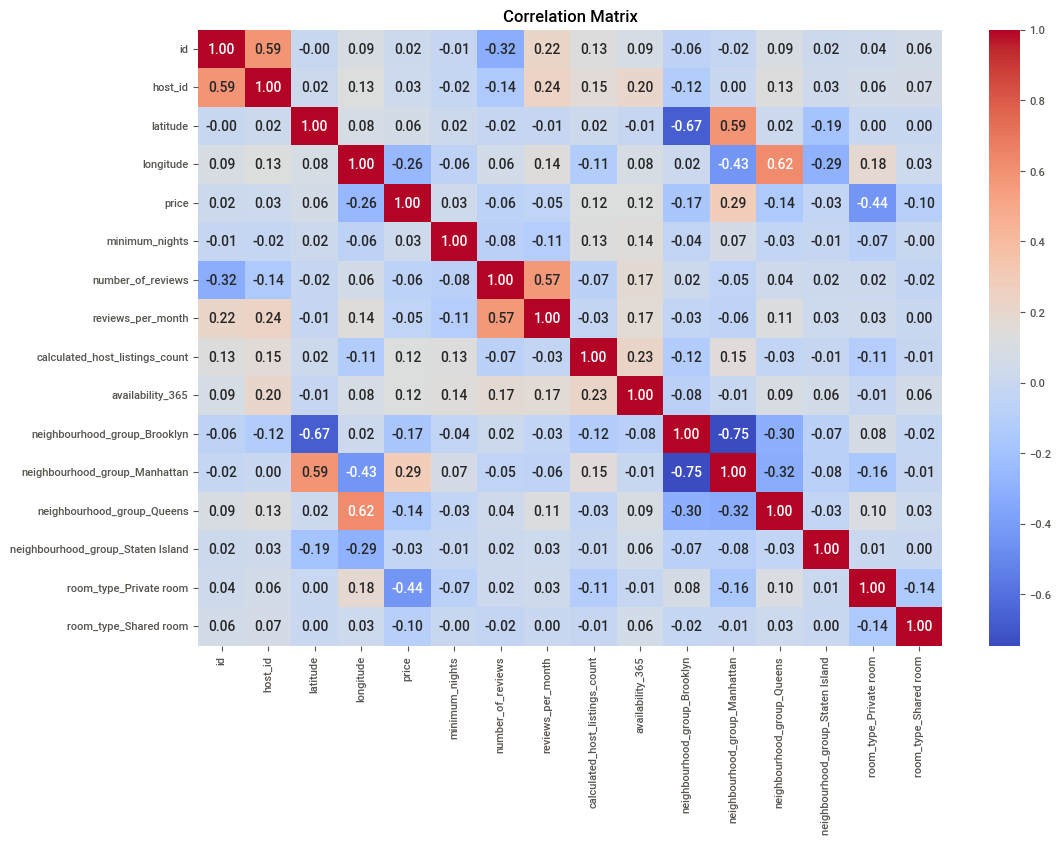

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
# Excluding non-numeric columns from the correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()

# Plot the correlation matrix for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Interpretation from above heatmap:

Look for pairs of features with high correlation values (close to +1 or -1).
If two features are highly correlated, consider removing one to reduce redundancy.

# Outlier Detection using Isolation Forest

## Identify and visualize anomalies in the dataset

* Use Isolation Forest to detect outliers in numerical features
* Impute missing values using the mean before fitting the model
* Classify data points as normal (1) or outliers (-1)
* Visualize anomalies based on price and number of reviews



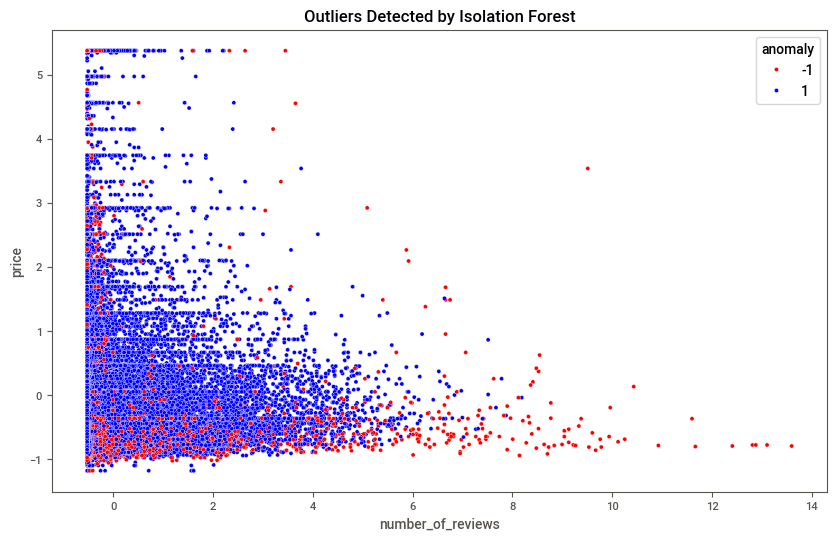

Number of detected outliers: 2445


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Assuming 'df' contains all necessary numerical features for outlier detection
# Assign 'df' to 'X' or copy if necessary
X = df.copy()  # Use copy to avoid modifying the original df

# Select only numerical columns for Isolation Forest
numerical_features = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median'
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% of data as outliers

# Fit the model and predict anomalies using only numerical features
# Use the imputed data for fitting
df['anomaly'] = iso_forest.fit_predict(X_numerical_imputed)

# Extract the outliers
outliers = df[df['anomaly'] == -1]

# Plot outliers for visual inspection (e.g., based on price and number of reviews)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Outliers Detected by Isolation Forest')
plt.show()

print(f"Number of detected outliers: {len(outliers)}")

# K-Means Clustering Analysis

## Determine optimal number of clusters

* Select relevant features for clustering
* Scale features using StandardScaler
* Apply K-Means clustering with different k values
* Plot elbow curve to identify optimal number of clusters



In [ ]:
# Select relevant features for clustering
features_for_clustering = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']  # Adjust as necessary
X_cluster = df[features_for_clustering]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

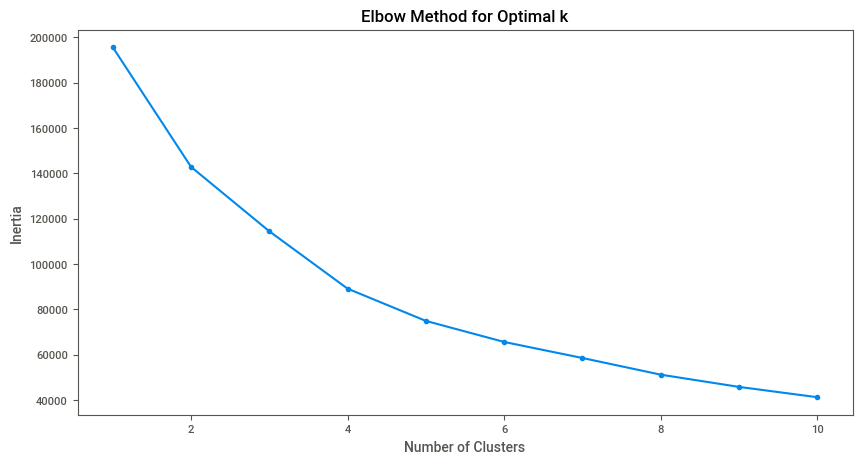

In [ ]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


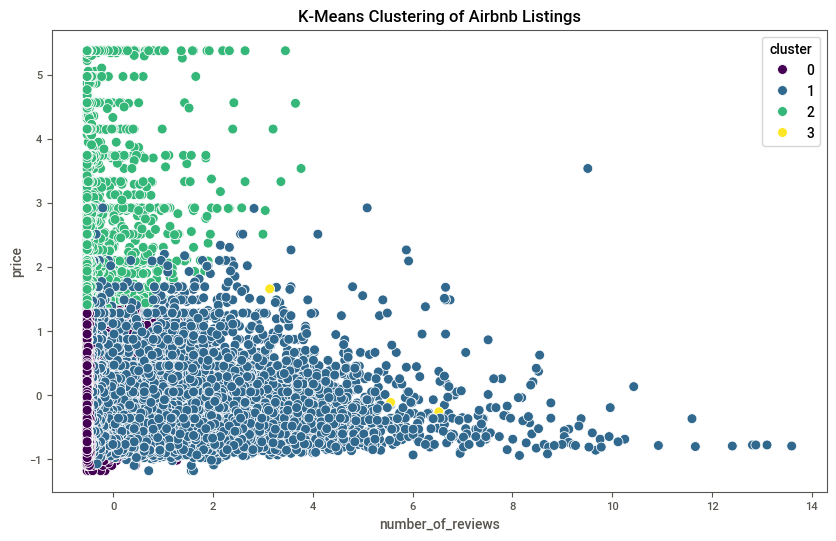

In [ ]:
# Fit K-Means with the selected number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize the clusters based on two features (e.g., price and number of reviews)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='cluster', palette='viridis', s=50)
plt.title('K-Means Clustering of Airbnb Listings')
plt.show()


# Automated Machine Learning with Auto_ViML

## Building predictive models for Airbnb pricing

* Import necessary libraries and define custom interpolation function
* Prepare data by splitting into training and testing sets
* Use Auto_ViML to automatically build and evaluate machine learning models
* Optimize for R-squared score using Random Search hyperparameter tuning



In [ ]:
import numpy as np

# Custom function to replace scipy's deprecated interp
def interp(x, xp, fp):
    return np.interp(x, xp, fp)


In [ ]:
!sed -i 's/from scipy import interp/import numpy as np\ninterp = lambda x, xp, fp: np.interp(x, xp, fp)/' /usr/local/lib/python3.10/dist-packages/autoviml/Auto_ViML.py


In [ ]:
from autoviml.Auto_ViML import Auto_ViML


# Define the target and feature columns
target = 'price'  # Assuming we're predicting price
X = df.drop(columns=[target])
y = df[target]


Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train[target] = y_train


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (39116, 22)
    Training Set Memory Usage = 5.15 MB
Test Set Shape = (9779, 21)
    Test Set Memory Usage = 1.21 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Numbe

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: name
Shape of Train Data: 39116 rows
    Shape of Test Data: 9779 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 39 seconds
Train data Text cleaning completed. Time taken = 41 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = name. This will take time...
    Selected the maximum number of features limit = 5000
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (31292,) and Cross Validation data = (7824,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 300.
[LightGBM]

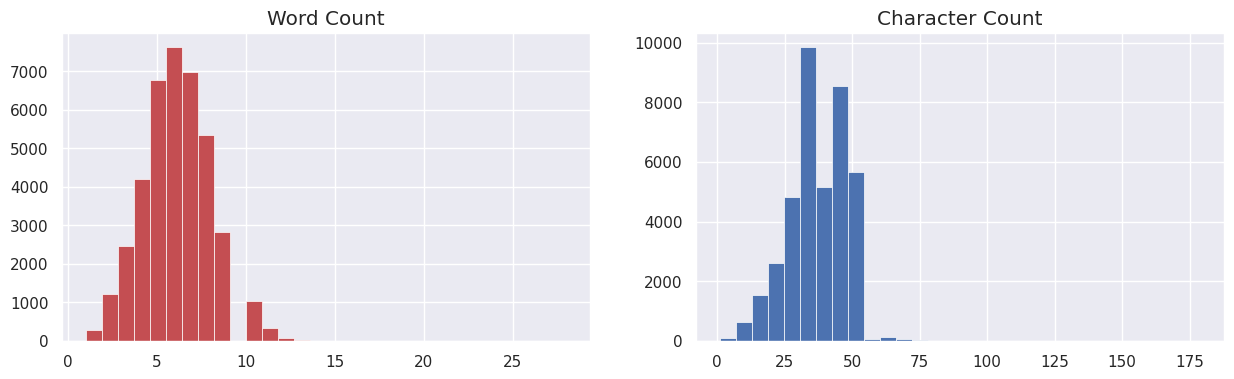

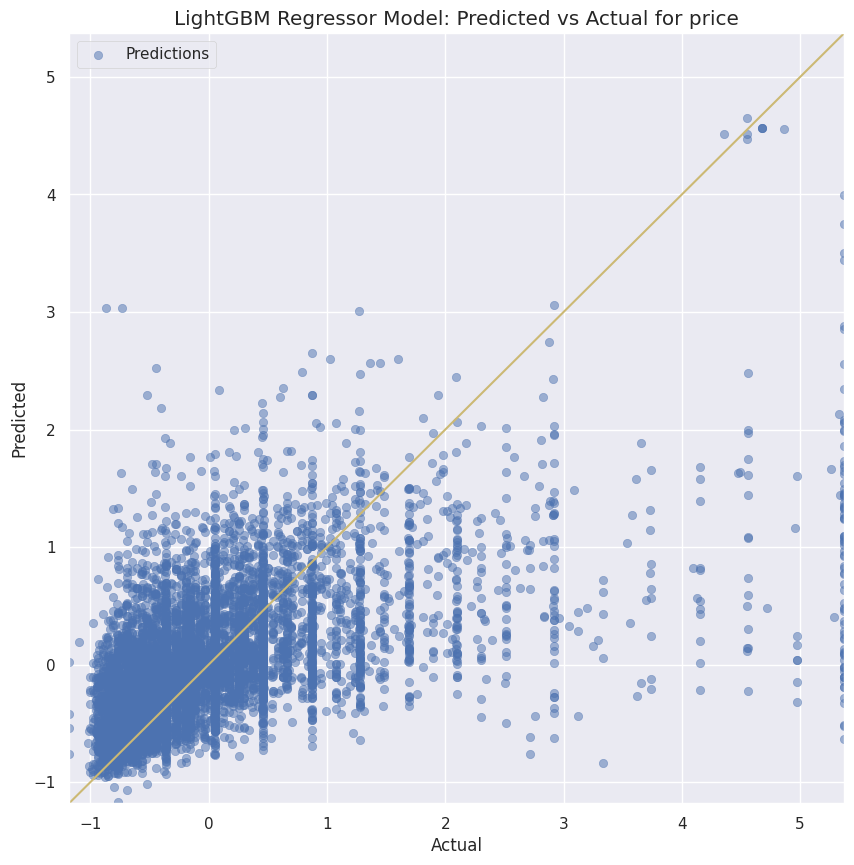

    MAE = 0.5032
    MAPE = 175%
    RMSE = 0.8308
    MAE as % std dev of Actuals = 66.4%
    Normalized RMSE (% of MinMax of Actuals) = 13%
    Normalized RMSE (% of Std Dev of Actuals) = 82%
  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 33 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 10 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 4948 term-matrix to 70 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (39116, 70)
    Time Taken for Truncated SVD = 2 seconds
TruncatedSVD Data Frame size = (39116, 70)
Reducing dimensions from 4948 term-matrix to 70 dimensi

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: host_name
Shape of Train Data: 39116 rows
    Shape of Test Data: 9779 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for host_name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 22 seconds
Train data Text cleaning completed. Time taken = 23 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = host_name. This will take time...
    Selected the maximum number of features limit = 3610
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (31292,) and Cross Validation data = (7824,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 

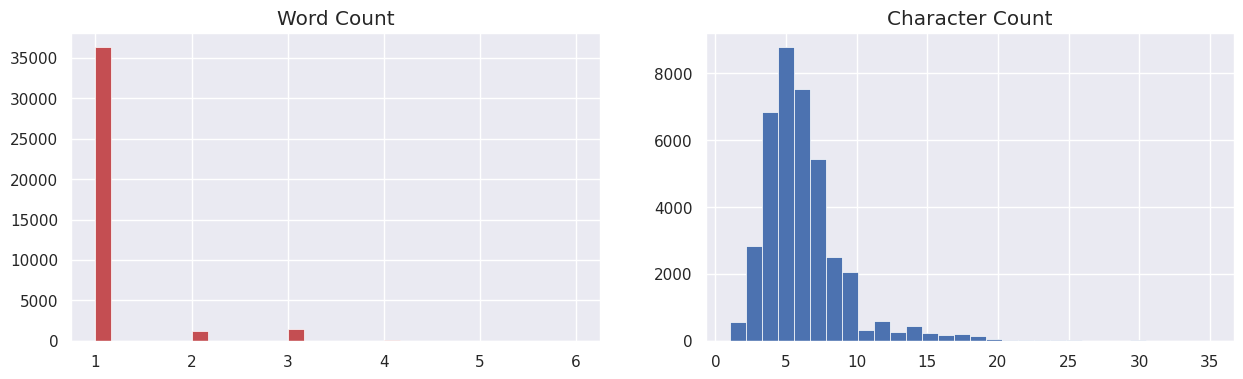

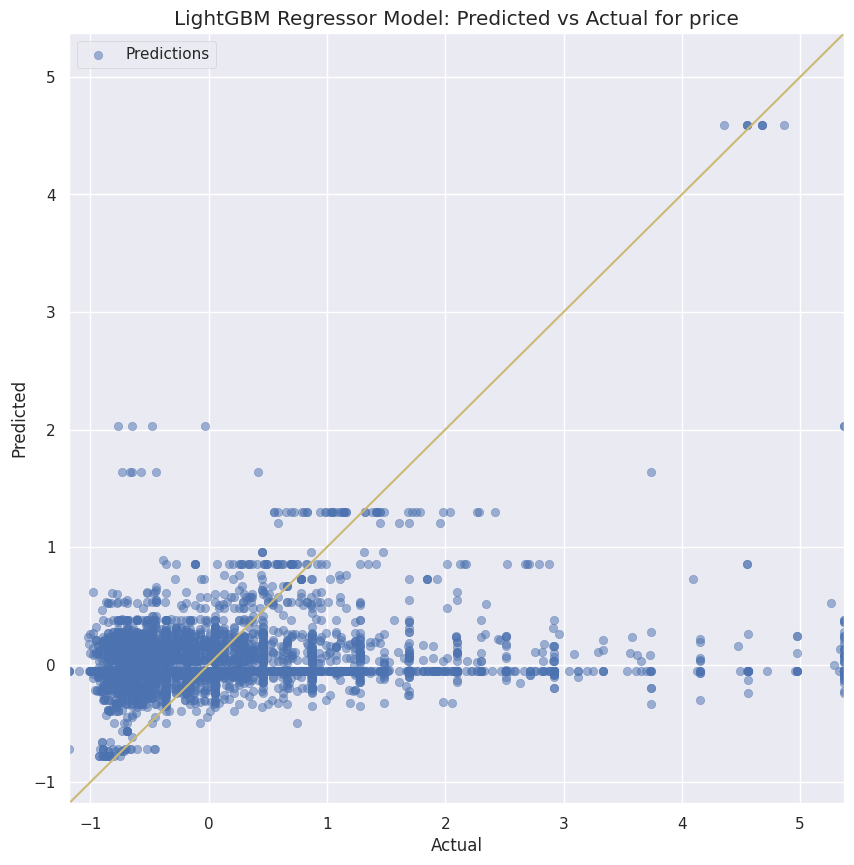

    MAE = 0.6398
    MAPE = 122%
    RMSE = 0.9842
    MAE as % std dev of Actuals = 84.4%
    Normalized RMSE (% of MinMax of Actuals) = 15%
    Normalized RMSE (% of Std Dev of Actuals) = 98%
  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 22 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 5 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 3009 term-matrix to 54 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (39116, 54)
    Time Taken for Truncated SVD = 1 seconds
TruncatedSVD Data Frame size = (39116, 54)
Reducing dimensions from 3009 term-matrix to 54 dimensio

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for last_review column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 23 seconds
Train data Text cleaning completed. Time taken = 24 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = last_review. This will take time...
    Selected the maximum number of features limit = 1
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (31292,) and Cross Validation data = (7824,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 300.
Auto_NLP error. Continuing without NLP processing
#######################################################

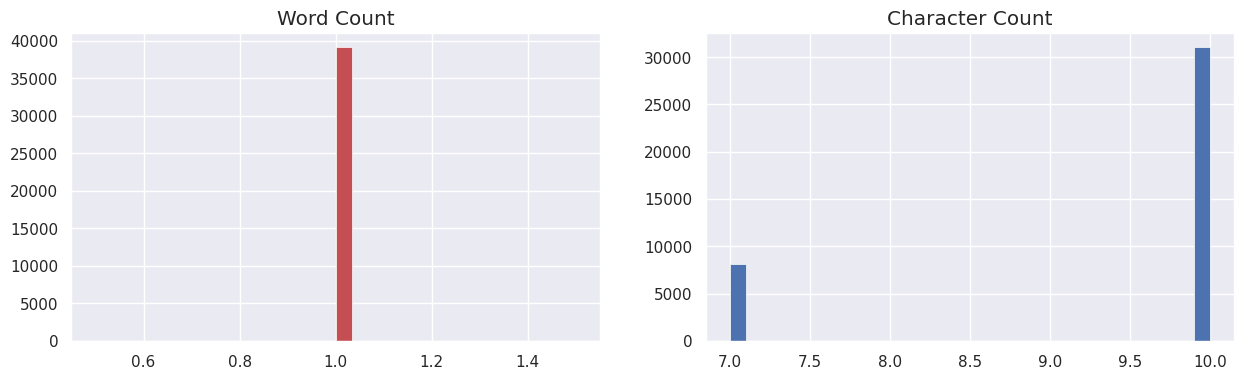

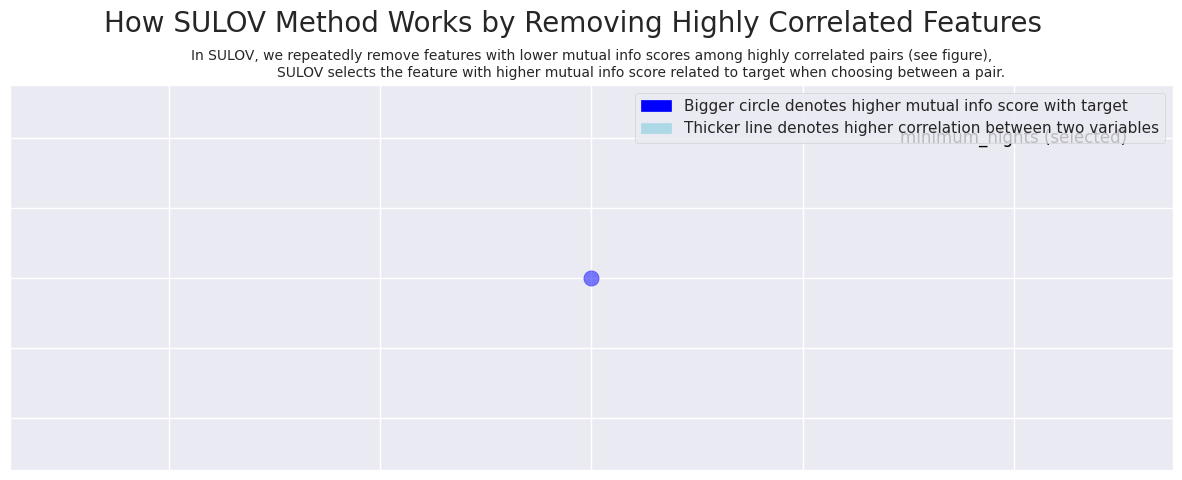

Splitting selected features into float and categorical (integer) variables:
    (5) float variables ...
    (14) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 19 
    Finding Important Features using Boosted Trees algorithm...
        using 19 variables...
        using 15 variables...
        using 11 variables...
        using 7 variables...
        using 3 variables...
Found 15 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  31292 , CV rows =  7824
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling

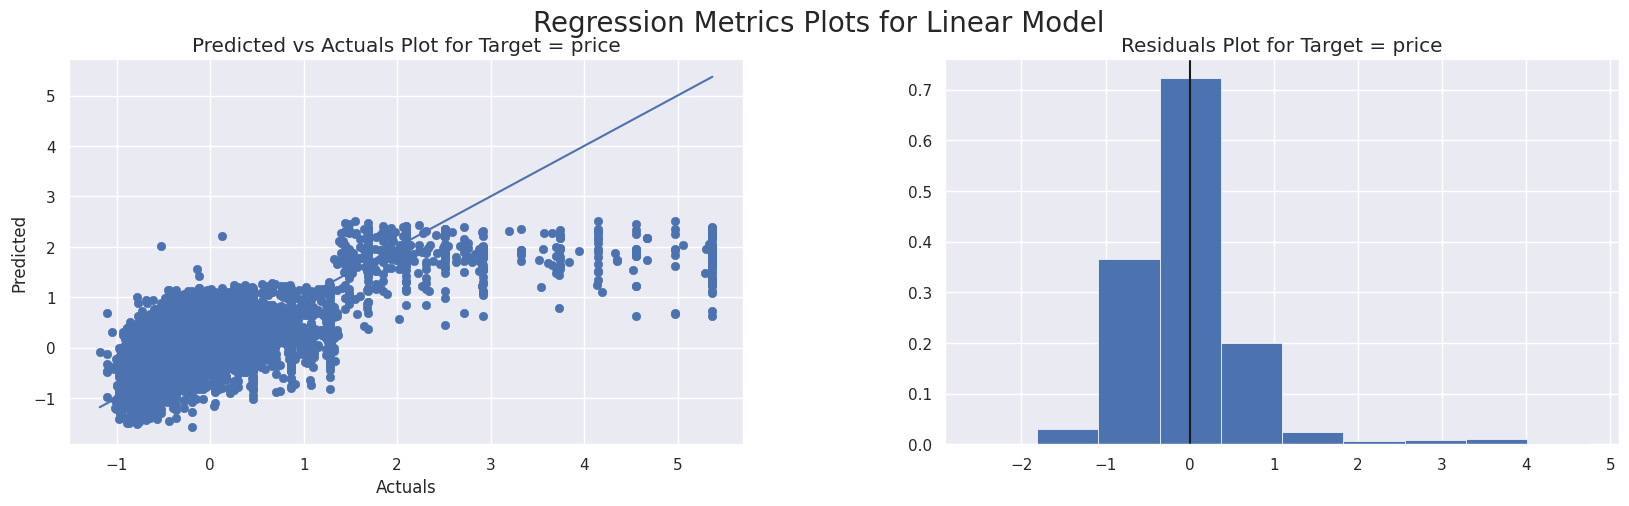

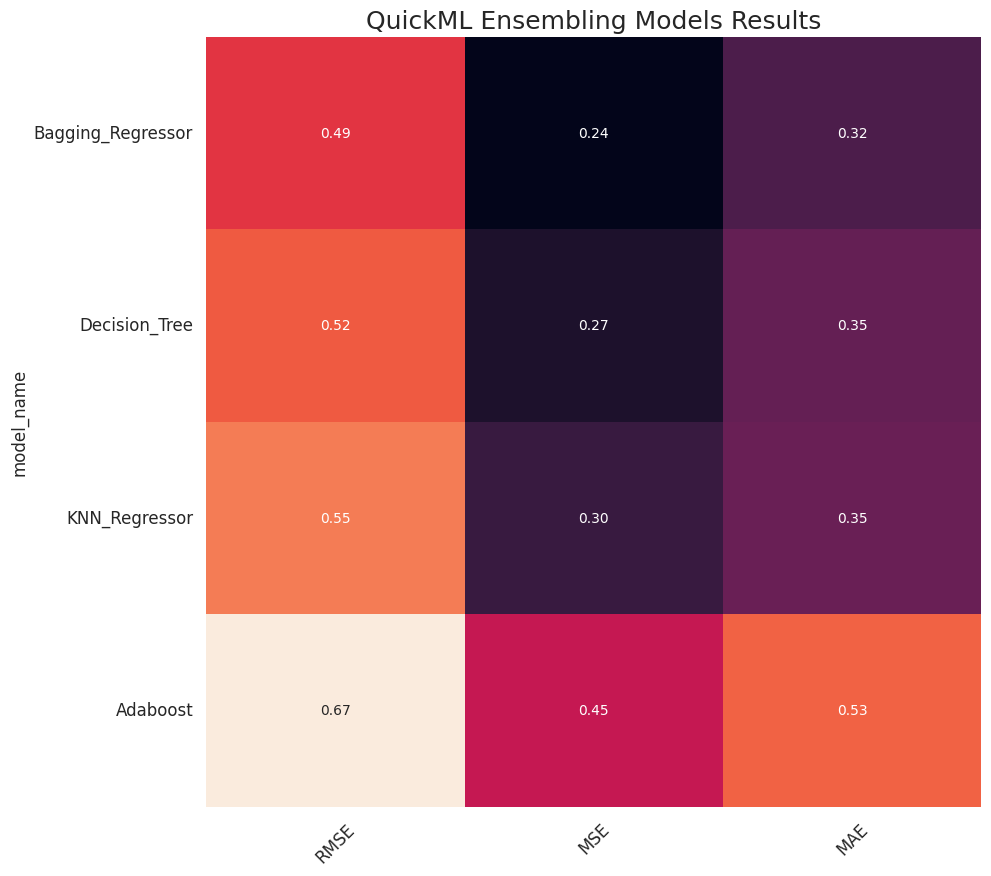

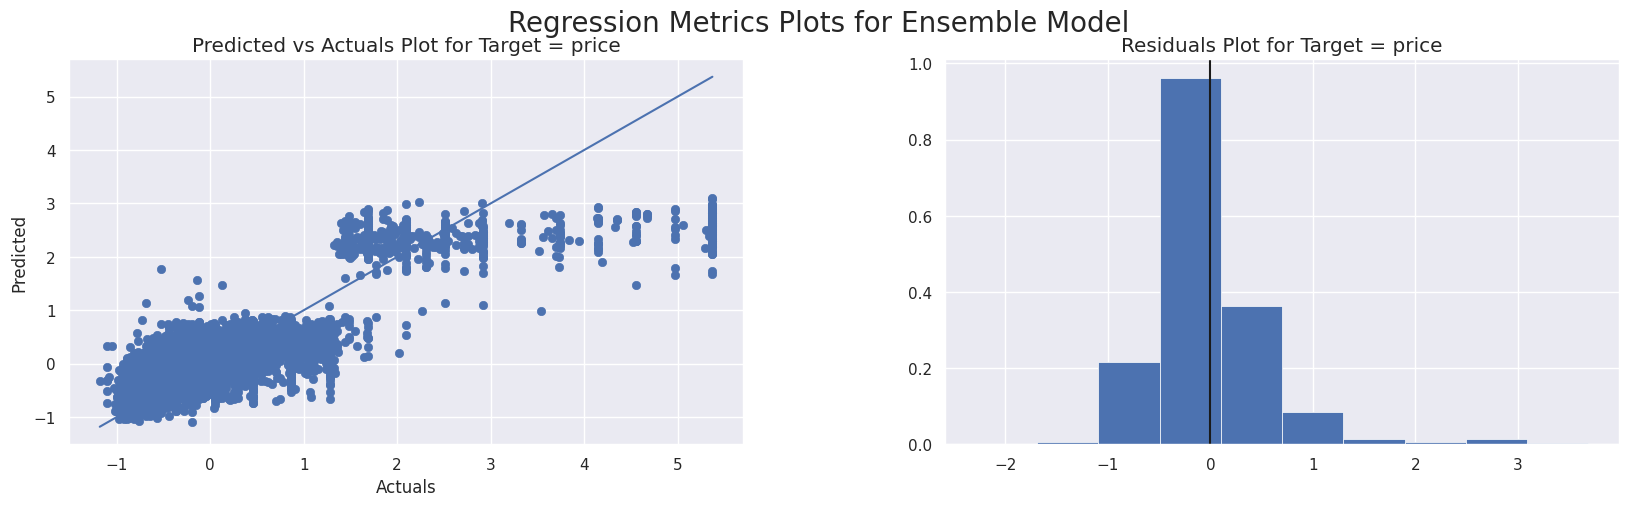

<Figure size 1500x500 with 0 Axes>

In [ ]:
result = Auto_ViML(
    train=X_train, target=target, test=X_test, scoring_parameter='r2',
    hyper_param='RS', feature_reduction=True, verbose=1
)


In [ ]:
print(result)

(LinearSVR(C=9.361309329775258, epsilon=0.813308412782129, max_iter=4000,
          random_state=99, tol=0.001), ['cluster', 'room_type_Private room', 'room_type_Shared room', 'anomaly', 'neighbourhood_group_Manhattan', 'longitude', 'minimum_nights', 'last_review_Missing_Flag', 'neighbourhood_group_Queens', 'calculated_host_listings_count', 'neighbourhood_group_Brooklyn', 'availability_365', 'host_id', 'neighbourhood_group_Staten Island', 'name_Missing_Flag'],        cluster  room_type_Private room  room_type_Shared room  anomaly  \
32645        0                       0                      0        1   
23615        0                       1                      0        1   
31183        0                       1                      0        1   
29260        1                       0                      0        1   
7275         0                       1                      0        1   
...        ...                     ...                    ...      ...   
11284        0   

### Examining Auto_ViML Results

## Display model predictions and selected features

* Extract the trained model and selected features from Auto_ViML results
* Print the first few rows of training set predictions
* Print the first few rows of test set predictions
* Analyze the model's performance on both training and test data



In [ ]:
model = result[0]
selected_features = result[1]


In [ ]:
train_predictions = result[2]
print(train_predictions.head())


       cluster  room_type_Private room  room_type_Shared room  anomaly  \
32645        0                       0                      0        1   
23615        0                       1                      0        1   
31183        0                       1                      0        1   
29260        1                       0                      0        1   
7275         0                       1                      0        1   

       neighbourhood_group_Manhattan  longitude  minimum_nights  \
32645                              0      -0.07           -0.20   
23615                              1       0.25           -0.25   
31183                              0      -0.16           -0.25   
29260                              0       0.45           -0.20   
7275                               0       1.22           -0.10   

       last_review_Missing_Flag  neighbourhood_group_Queens  \
32645                         0                           0   
23615                     

In [ ]:
test_predictions = result[3]  # Contains original test data with added prediction columns
print(test_predictions.head())


             id  cluster  room_type_Private room  room_type_Shared room  \
879      317905     0.00                    0.00                   0.00   
44383  34205267     0.00                    1.00                   0.00   
15394  12342297     0.00                    1.00                   0.00   
43230  33527778     0.67                    0.00                   0.00   
16332  13136376     0.00                    0.00                   0.00   

       anomaly  neighbourhood_group_Manhattan  longitude  minimum_nights  \
879       1.00                           0.00       0.50            0.00   
44383     1.00                           0.00       0.63            0.02   
15394     1.00                           1.00       0.48            0.00   
43230     0.00                           1.00       0.44            0.00   
16332     1.00                           1.00       0.59            0.00   

       last_review_Missing_Flag  neighbourhood_group_Queens  \
879                        0.